Для инвестирования 5 млн руб. и cтавки купона, равного 20% разработайте внебиржевой опцион “Autocallable” с ежеквартальным купоном и возможностью досрочного автоматического погашения опциона каждые 3 месяца, если на ежеквартальную купонную дату текущая цена бумаги с наибольшим снижением относительно своей первоначальной стоимости (worst-of performance) превышает или равна барьеру отзыва.

Если продукт не был отозван досрочно, и на последнюю купонную дату текущая цена worst of превышает или равна барьеру поставки, то продукт погашается с выплатой 100% номинала. Иначе, если хотя бы один базовый актив опциона оказался ниже барьера поставки, то осуществляется выплата денежных средств в сумме, равной эквиваленту «поставки бумаги», бумаги с наибольшим снижением относительно своей первоначальной стоимости, по ее первоначальной цене.

В корзину включить четыре базовых актива, первоначальную стоимость определить на день, предшествующий дате запуска (100%). Установить барьер отзыва 105%, купонный барьер 98%, барьер поставки 90% в процентах от первоначальной стоимости каждого базового актива корзину.

**Дата запуска:** 27-07-2022.

**Дата погашения:** 25-07-2023.

**Даты ежеквартальных наблюдений:** 25-10-2022, 25-01-2023, 25-04-2023.

1. Определить действия на купонные даты (выплачивается купон; выплачивается купон с досфрочным погашением продукта; не выплачивается, но запоминается; выплачивается купон за текущий и предыдущие кварталы; производится погашение продукта с «эффектом поставки»).
1. Вычислить финансовый результат по состоянию на 25-04-2023,
определить бумагу с наибольшим снижением относительно своей первоначальной стоимости.
1. Привести иллюстративные графики, на которых отобразить бумагу с наибольшим снижением относительно своей первоначальной стоимости (worst-of performance), купонные даты и действия в эти даты, уровни барьеров отзыва, поставки и купонного барьера, первоначальную стоимость актива,
провести исследование влияния уровней барьеров (барьер отзыва, купонный барьер, барьер поставки) на финансовый результат.
1. Повторить расчеты для метода оценки базовых активов -- средневзвешенная динамика стоимости всех активов (average-of perfomance).

[Примеры графиков и расчетов.](https://www.open-broker.com/files/Presentation_OTC-Option_Autocallable_.pdf)


Option Analysis Results:
            Coupon_Paid  Accumulated_Coupons  Early_Redeemed  Redemption_Value
Date                                                                          
2022-10-25         True                 0.05           False               NaN
2023-01-25         True                 0.10           False               NaN
2023-04-25         True                 0.15           False               NaN
2023-07-25         True                 0.20            True         5000000.0

Total Payout: 6,000,000.00 RUB
Annualized Yield: 20.12%
Product was redeemed early on 2023-07-25.


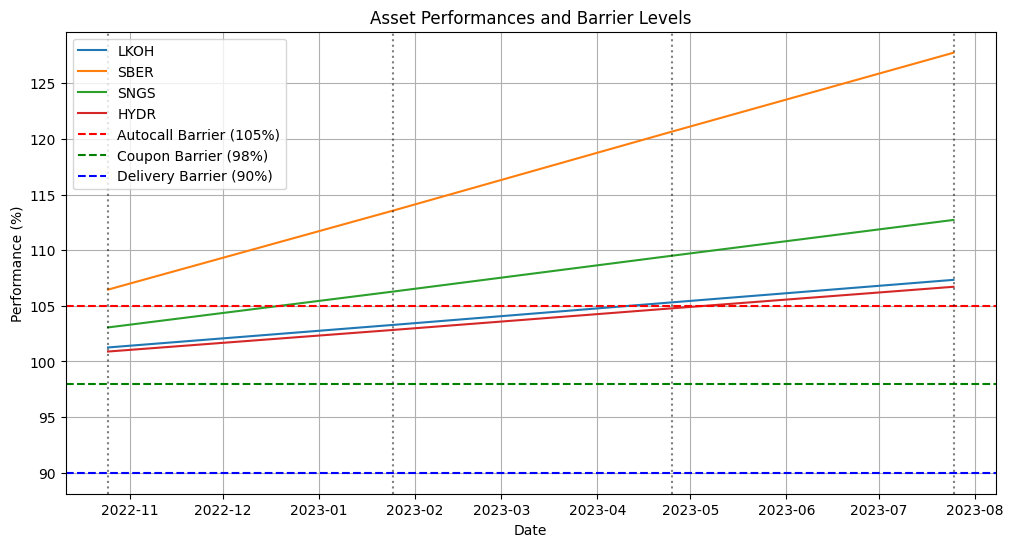

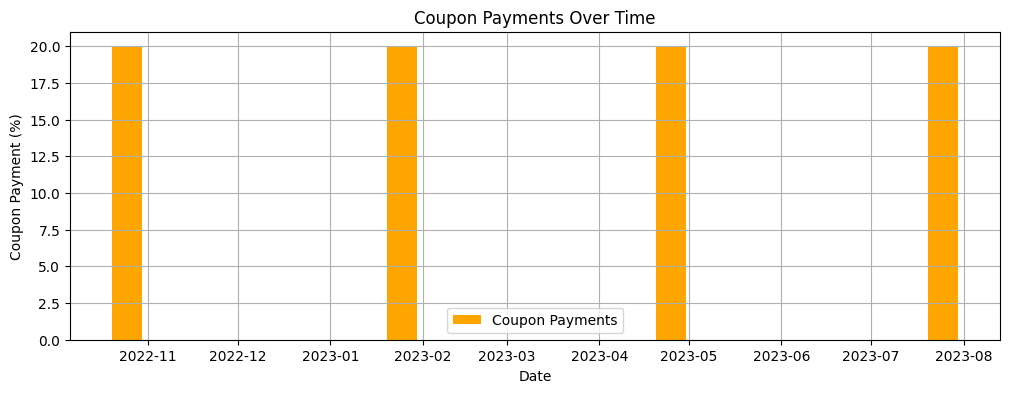


Alternative Scenario (Average-of Performance):
            Coupon_Paid_Avg  Accumulated_Coupons_Avg  Early_Redeemed_Avg  \
Date                                                                       
2022-10-25             True                     0.05               False   
2023-01-25             True                     0.10                True   
2023-04-25            False                     0.00               False   
2023-07-25            False                     0.00               False   

            Redemption_Value_Avg  
Date                              
2022-10-25                   0.0  
2023-01-25                   0.0  
2023-04-25                   0.0  
2023-07-25             5000000.0  

Total Payout (Average-of): 5,500,000.00 RUB
Annualized Yield (Average-of): 10.06%


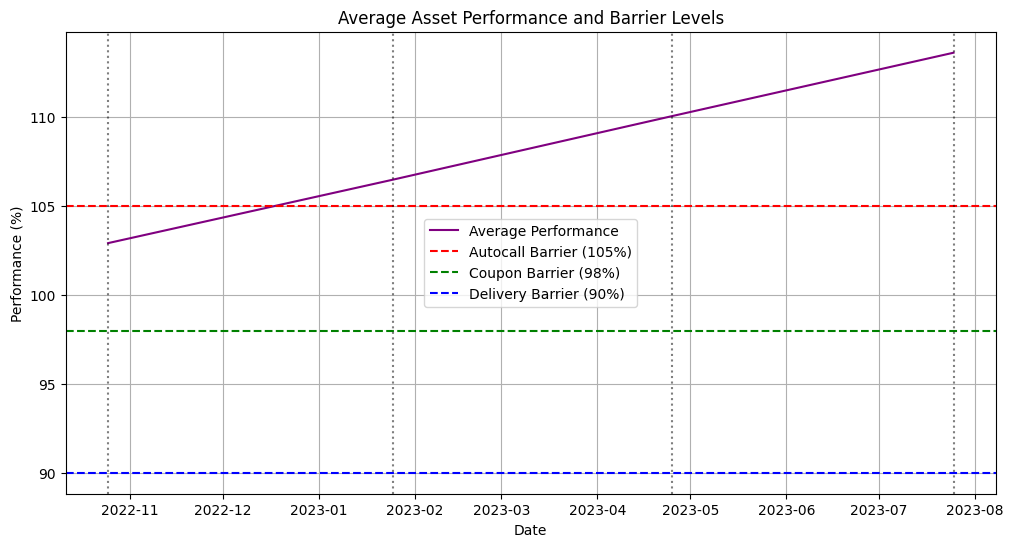

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# -----------------------------
# Step 1: Define Initial Parameters and Data
# -----------------------------
investment_amount = 5_000_000
annual_coupon_rate = 0.20
start_date = pd.to_datetime('2022-07-27')

observation_dates = pd.to_datetime([
    '2022-10-25',
    '2023-01-25',
    '2023-04-25',
    '2023-07-25'
])

initial_prices = {
    'LKOH': 2468.9,
    'SBER': 70.45,
    'SNGS': 31.05,
    'HYDR': 0.5154
}

autocall_barrier = 1.05    # 105%
coupon_barrier = 0.98      # 98%
delivery_barrier = 0.90    # 90%

assets = list(initial_prices.keys())

# -----------------------------
# Step 2: Input Asset Prices on Observation Dates
# -----------------------------

data = {
    'Date': observation_dates,
    'LKOH': [2500, 2550, 2600, 2650],
    'SBER': [75, 80, 85, 90],
    'SNGS': [32, 33, 34, 35],
    'HYDR': [0.52, 0.53, 0.54, 0.55]
}

prices_df = pd.DataFrame(data)
prices_df.set_index('Date', inplace=True)

# -----------------------------
# Step 3: Calculate Performance Ratios
# -----------------------------

for asset in assets:
    prices_df[f'{asset}_Perf'] = prices_df[asset] / initial_prices[asset]

# -----------------------------
# Step 4: Determine Coupon Payments
# -----------------------------

prices_df['Coupon_Paid'] = False
prices_df['Accumulated_Coupons'] = 0.0
prices_df['Early_Redeemed'] = False
prices_df['Redemption_Date'] = pd.NaT

accumulated_coupons = 0.0
early_redeemed = False

for idx, row in prices_df.iterrows():
    if early_redeemed:
        continue

    above_coupon_barrier = all(row[f'{asset}_Perf'] >= coupon_barrier for asset in assets)

    quarterly_coupon = annual_coupon_rate / 4

    if above_coupon_barrier:
        accumulated_coupons += quarterly_coupon
        prices_df.at[idx, 'Coupon_Paid'] = True

    worst_of_perf = min(row[f'{asset}_Perf'] for asset in assets)

    if worst_of_perf >= autocall_barrier:
        prices_df.at[idx, 'Early_Redeemed'] = True
        prices_df.at[idx, 'Redemption_Date'] = idx
        early_redeemed = True

    prices_df.at[idx, 'Accumulated_Coupons'] = accumulated_coupons

# -----------------------------
# Step 5: Final Redemption Calculation
# -----------------------------

if not early_redeemed:
    final_date = prices_df.index[-1]
    final_row = prices_df.loc[final_date]

    worst_of_perf = min(final_row[f'{asset}_Perf'] for asset in assets)

    if worst_of_perf >= delivery_barrier:
        redemption_value = investment_amount
    else:
        worst_asset = min(assets, key=lambda x: final_row[f'{x}_Perf'])
        worst_asset_final_price = final_row[worst_asset]
        worst_asset_initial_price = initial_prices[worst_asset]
        redemption_value = investment_amount * (worst_asset_final_price / worst_asset_initial_price)

    prices_df.at[final_date, 'Redemption_Value'] = redemption_value
    prices_df.at[final_date, 'Redemption_Date'] = final_date
else:
    redemption_date = prices_df[prices_df['Early_Redeemed']].index[0]
    prices_df.at[redemption_date, 'Redemption_Value'] = investment_amount

# -----------------------------
# Step 6: Calculate Total Payout and Yield
# -----------------------------

if early_redeemed:
    total_payout = investment_amount + (accumulated_coupons * investment_amount)
    redemption_date = prices_df[prices_df['Early_Redeemed']].index[0]
    holding_period = (redemption_date - start_date).days / 365
else:
    total_payout = redemption_value + (accumulated_coupons * investment_amount)
    holding_period = (final_date - start_date).days / 365

annualized_yield = ((total_payout / investment_amount) ** (1 / holding_period)) - 1

# -----------------------------
# Step 7: Display Results
# -----------------------------

print("Option Analysis Results:")
print(prices_df[['Coupon_Paid', 'Accumulated_Coupons', 'Early_Redeemed', 'Redemption_Value']])
print(f"\nTotal Payout: {total_payout:,.2f} RUB")
print(f"Annualized Yield: {annualized_yield * 100:.2f}%")

if early_redeemed:
    print(f"Product was redeemed early on {redemption_date.date()}.")
else:
    print("Product was not redeemed early.")
    if redemption_value == investment_amount:
        print("Full nominal amount was returned at maturity.")
    else:
        print("Product experienced 'delivery effect' at maturity.")

# -----------------------------
# Step 8: Plotting the Results
# -----------------------------

plt.figure(figsize=(12, 6))
for asset in assets:
    plt.plot(prices_df.index, prices_df[f'{asset}_Perf'] * 100, label=asset)

plt.axhline(y=autocall_barrier * 100, color='r', linestyle='--', label='Autocall Barrier (105%)')
plt.axhline(y=coupon_barrier * 100, color='g', linestyle='--', label='Coupon Barrier (98%)')
plt.axhline(y=delivery_barrier * 100, color='b', linestyle='--', label='Delivery Barrier (90%)')

for date in observation_dates:
    plt.axvline(x=date, color='k', linestyle=':', alpha=0.5)

plt.title('Asset Performances and Barrier Levels')
plt.xlabel('Date')
plt.ylabel('Performance (%)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 4))
coupon_payment_dates = prices_df[prices_df['Coupon_Paid']].index
coupon_payments = [accumulated_coupons * 100] * len(coupon_payment_dates)
plt.bar(coupon_payment_dates, coupon_payments, width=10, color='orange', label='Coupon Payments')
plt.title('Coupon Payments Over Time')
plt.xlabel('Date')
plt.ylabel('Coupon Payment (%)')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# Step 9: Alternative Calculation (Average-of Performance)
# -----------------------------

prices_df['Average_Perf'] = prices_df[[f'{asset}_Perf' for asset in assets]].mean(axis=1)
prices_df['Coupon_Paid_Avg'] = False
prices_df['Accumulated_Coupons_Avg'] = 0.0
prices_df['Early_Redeemed_Avg'] = False
prices_df['Redemption_Value_Avg'] = 0.0
accumulated_coupons_avg = 0.0
early_redeemed_avg = False

for idx, row in prices_df.iterrows():
    if early_redeemed_avg:
        continue

    if row['Average_Perf'] >= coupon_barrier:
        accumulated_coupons_avg += quarterly_coupon
        prices_df.at[idx, 'Coupon_Paid_Avg'] = True

    if row['Average_Perf'] >= autocall_barrier:
        prices_df.at[idx, 'Early_Redeemed_Avg'] = True
        early_redeemed_avg = True

    prices_df.at[idx, 'Accumulated_Coupons_Avg'] = accumulated_coupons_avg

if not early_redeemed_avg:
    final_avg_perf = prices_df.at[final_date, 'Average_Perf']
    if final_avg_perf >= delivery_barrier:
        redemption_value_avg = investment_amount
    else:
        redemption_value_avg = investment_amount * final_avg_perf

    prices_df.at[final_date, 'Redemption_Value_Avg'] = redemption_value_avg
else:
    prices_df.at[idx, 'Redemption_Value_Avg'] = investment_amount

if early_redeemed_avg:
    total_payout_avg = investment_amount + (accumulated_coupons_avg * investment_amount)
else:
    total_payout_avg = redemption_value_avg + (accumulated_coupons_avg * investment_amount)

annualized_yield_avg = ((total_payout_avg / investment_amount) ** (1 / holding_period)) - 1

# -----------------------------
# Step 10: Display Alternative Scenario Results
# -----------------------------

print("\nAlternative Scenario (Average-of Performance):")
print(prices_df[['Coupon_Paid_Avg', 'Accumulated_Coupons_Avg', 'Early_Redeemed_Avg', 'Redemption_Value_Avg']])
print(f"\nTotal Payout (Average-of): {total_payout_avg:,.2f} RUB")
print(f"Annualized Yield (Average-of): {annualized_yield_avg * 100:.2f}%")

plt.figure(figsize=(12, 6))
plt.plot(prices_df.index, prices_df['Average_Perf'] * 100, label='Average Performance', color='purple')

plt.axhline(y=autocall_barrier * 100, color='r', linestyle='--', label='Autocall Barrier (105%)')
plt.axhline(y=coupon_barrier * 100, color='g', linestyle='--', label='Coupon Barrier (98%)')
plt.axhline(y=delivery_barrier * 100, color='b', linestyle='--', label='Delivery Barrier (90%)')

for date in observation_dates:
    plt.axvline(x=date, color='k', linestyle=':', alpha=0.5)

plt.title('Average Asset Performance and Barrier Levels')
plt.xlabel('Date')
plt.ylabel('Performance (%)')
plt.legend()
plt.grid(True)
plt.show()
